In [1]:
import numpy as np
import cv2
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def extract_features(image_path):
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, (64, 64)) 
    flattened_image = resized_image.flatten()  
    return flattened_image

In [3]:
cat_images = glob.glob('Downloads/cat/cat*.jpg')  
dog_images = glob.glob('Downloads/dog/dog*.jpg') 

In [4]:
labels = [0] * len(cat_images) + [1] * len(dog_images)

In [5]:
all_images = cat_images + dog_images

X = [extract_features(image) for image in all_images]

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

svm_model = svm.SVC(kernel='linear')

svm_model.fit(X_train, y_train)

predictions = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Kaggle Dataset: {accuracy * 100:.2f}%")

Accuracy on Kaggle Dataset: 52.70%


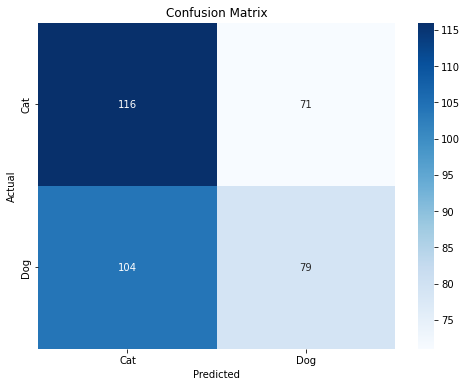

In [6]:
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

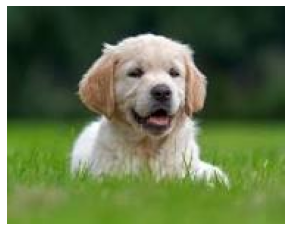

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')  
    plt.show()


show_image('download (1).jfif')


In [9]:
sample_image_path = 'download (1).jfif'  
sample_image = extract_features(sample_image_path)
sample_prediction = svm_model.predict([sample_image])

if sample_prediction[0] == 0:
    print("Sample Image is classified as: Cat")
else:
    print("Sample Image is classified as: Dog")


Sample Image is classified as: Dog
